## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 선형대수학 및 통계학
- 평가일 : 21.7.30
- 성명 :
- 점수 :

Q1. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요.  
x축은 np.arange(0,20,0.1) 

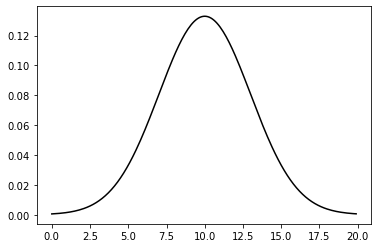

In [ ]:
# A.
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
x_plot = np.arange(0,20,0.1)
len(x_plot)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=10,scale=3),color='k')

Q2. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요.  
x축 : np.arange(-3,8,0.1)

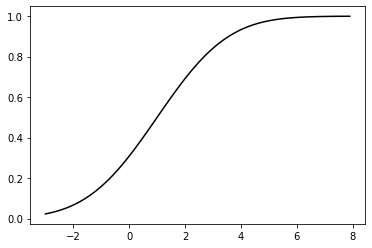

In [ ]:
# A.
x_plot = np.arange(-3,8,0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot,loc=1,scale=2),color='black')

Q3. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [ ]:
df1 = pd.read_csv('dataset/5_2_fm.csv')

In [ ]:
# A1.
df2=df1.copy()
print(df2)
df2.species.replace({'A':'C','B':'D'},inplace=True)
df2

  species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10


,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8
5,D,10


In [ ]:
# A2.
def change(a,b):
    if a == 'C':
        return b*2
    else:
        return b*3

df2['len'] = df2.apply(lambda x : change(x['species'],x['length']),axis=1)
df2.length = df2.len
df2.drop('len',axis=1,inplace=True)
df = pd.concat([df1,df2])
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
6,C,4
7,C,6
8,C,8
9,D,18


In [ ]:
# A3.
m = df.groupby('species').mean()
std = df.groupby('species').std()
print(m,'\n')
print(std)

         length
species        
A             3
B             8
C             6
D            24 

         length
species        
A           1.0
B           2.0
C           2.0
D           6.0


Q4. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성하세요. 
- 피벗테이블을 이용, 교차분석표를 만드세요(values='sales',aggfunc='sum', index= 'store', columns = 'color')

In [ ]:
import pandas as pd
shoes = pd.read_csv("./dataset/5_2_shoes.csv")

In [ ]:
# A1.
shoes1=shoes.copy()
df = pd.concat([shoes,shoes1],ignore_index=True)
df 

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
4,tokyo,blue,10
5,tokyo,red,15
6,osaka,blue,13
7,osaka,red,9


In [ ]:
# A2. 교차 분석표
cross = pd.pivot_table(data = df, values='sales',aggfunc='sum', index= 'store', columns = 'color')
cross

color,blue,red
store,,
osaka,26,18
tokyo,20,30


Q5. 주어진 fish 데이터로 다음사항을 수행하세요.
- 모평균의 점추정, 모분산의 점추정
- 자유도, 표준오차
- 신뢰구간 계산 

In [ ]:
df = pd.read_csv('dataset/5_7_fl.csv')
fish = df['length']
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

In [ ]:
# A1.
mu = np.mean(fish)
print('평균:',round(mu,2))
sigma_2 = np.var(fish, ddof=1)
print('분산:',round(sigma_2,2))

평균: 4.19
분산: 0.68


In [ ]:
# A2.
df = len(fish) - 1
print('자유도:',df)
sigma = np.std(fish,ddof=1)
se = sigma/np.sqrt(len(fish))
print('표준오차:',round(se,2))

자유도: 9
표준오차: 0.26


In [ ]:
# A3.
from scipy import stats
interval = stats.t.interval(
    alpha=0.95, df=df, loc=mu, scale=se)
print('신뢰구간:',interval)

신뢰구간: (3.5970100568358245, 4.777068592173221)


Q6. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [ ]:
titanic = pd.read_csv('dataset/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:xlabel='None-pclass', ylabel='sex'>

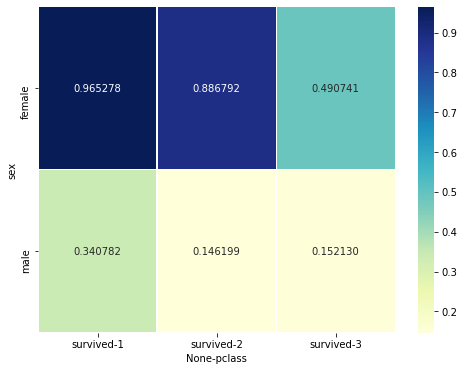

In [ ]:
# A. 여성, 일등석의 승객 생존율은 96% 인 반면 남성, 삼등석 승객 생존율은 15%
import seaborn as sns
import matplotlib.pyplot as plt
table = titanic.pivot_table(index=['sex'],columns=['pclass'],values=['survived'],\
                        aggfunc='mean')
table
plt.figure(figsize=(8,6))
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='YlGnBu',
           linewidth=.5,
           cbar=True)

Q7. 4행 5열 배열과 5행 3열 배열을 생성하여 a, b 이름으로 저장 후 a, b의 행렬 곱을 구하세요. (출력 결과는 4행 3열 배열)

In [ ]:
# A.
import numpy as np
import pandas as pd

a = np.arange(20).reshape(4,5)
b = np.arange(15).reshape(5,3)

np.dot(a,b)

array([[ 90, 100, 110],
       [240, 275, 310],
       [390, 450, 510],
       [540, 625, 710]])

Q8. Q. fish_multi 데이터프레임으로 다음을 수행하세요.
- A, B 두개의 그룹의 Box Plot을 그리고 이상치를 구하세요.
- 이상치를 제거한 후 Box Plot으로 이상치 여부를 확인하세요.
- 바이올린 플롯을 표현하세요.

In [ ]:
import pandas as pd
fish_multi = pd.read_csv("dataset/4_fm2.csv")
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      10
6        A       4
7        A       5
8        A       5
9        A       6
10       B       2
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


이상치: [10]
이상치: [2]


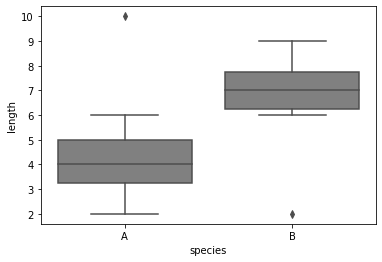

In [ ]:
# A1.
import seaborn as sns
sns.boxplot(x = "species", y  = "length", 
            data = fish_multi, color = 'gray')
import numpy as np
groupA = fish_multi.groupby('species').get_group('A')['length']
groupB = fish_multi.groupby('species').get_group('B')['length']

# 사용자 함수
def outlier(x):
#     q1, q3 = np.quantile(x, [0.25, 0.75])
    q1 = x.describe()['25%']
    q3 = x.describe()['75%']
    iqr = q3 - q1
    ucheck = q3 + iqr * 1.5
    lcheck = q1 - iqr * 1.5
    uw = x [ x < ucheck ].max()
    lw = x [ x > lcheck ].min()
    outlier = x [(x > uw) | (x < lw)]

    print(f'이상치: {sorted(outlier.values)}')    
   
outlier(groupA)
outlier(groupB)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
6        A       4
7        A       5
8        A       5
9        A       6
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


<AxesSubplot:xlabel='species', ylabel='length'>

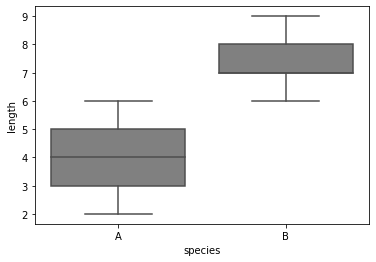

In [ ]:
# A2.
index_fm = fish_multi[((fish_multi.length==10) & (fish_multi.species =='A')) | \
                      ((fish_multi.length==2) & (fish_multi.species =='B'))].index
fm2 = fish_multi.drop(index_fm)
print(fm2)
sns.boxplot(x = "species", y  = "length", 
            data = fm2, color = 'gray')

<AxesSubplot:xlabel='species', ylabel='length'>

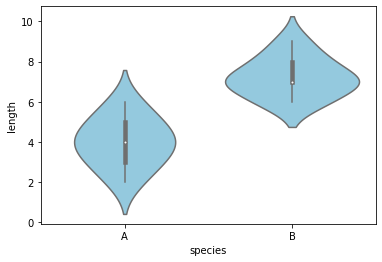

In [ ]:
# A3.
sns.violinplot(x='species',y='length',
              data = fm2, color= 'skyblue')

Q9. df_auto mpg 컬럼과 weight 컬럼에 대하여 산점도, 회귀선, 히스토그램을 
그래프로 같이 표현하여 탐색 후 인사이트를 기술하세요.

In [ ]:
import pandas as pd
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


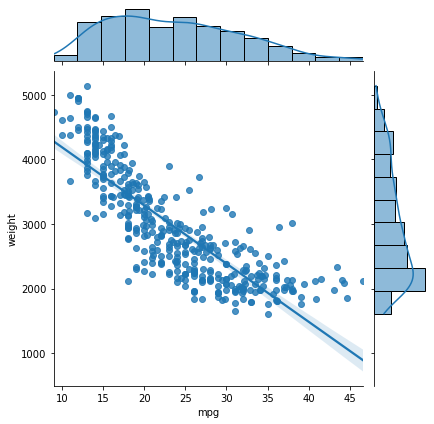

In [ ]:
# A.
import warnings
warnings.filterwarnings('ignore')
sns.jointplot('mpg','weight',data=df_auto,kind='reg')

Q10. 샘플사이즈가 크면 불편분산은 모분산에 가까워진다는 것을 그래프로 증명하세요. 단, 모분산은 아래 모집단으로 부터 도출된다.

In [ ]:
population = stats.norm(loc = 4, scale = 0.8)

Text(0, 0.5, 'unbias var')

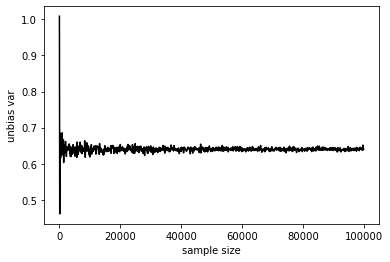

In [ ]:
# A.
size_array = np.arange(10,100100,100)
unbias_var_array_size=np.zeros(len(size_array))

np.random.seed(1)
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample,ddof=1)
plt.plot(size_array,unbias_var_array_size, color='black')
plt.xlabel('sample size')
plt.ylabel('unbias var')